In [3]:
pip install chefboost

Importando bibliotecas

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from chefboost import Chefboost as chef
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

Abrindo arquivo CSV

In [5]:
base = pd.read_csv('https://raw.githubusercontent.com/Gustavolorenzz/IA/main/Bases/student-por.csv', sep=';')
colunas_desejadas = ['absences','failures', 'higher','G1','G2','G3']

base = base[colunas_desejadas]
base

,absences,failures,higher,G1,G2,G3
0,4,0,yes,0,11,11
1,2,0,yes,9,11,11
2,6,0,yes,12,13,12
3,0,0,yes,14,14,14
4,0,0,yes,11,13,13
...,...,...,...,...,...,...
644,4,1,yes,10,11,10
645,4,0,yes,15,15,16
646,6,0,yes,11,12,9
647,6,0,yes,10,10,10


Mapeamento de Qualificação

In [6]:
def mapear_qualificacao(nota):
    if nota >= 17.5:
        return 'Excellent'
    elif nota >= 15.5:
        return 'Very good'
    elif nota >= 13.5:
        return 'Good'
    elif nota >= 9.5:
        return 'Sufficient'
    elif nota >= 3.5:
        return 'Weak'
    else:
        return 'Poor'

# Aplicar a função às colunas G1, G2 e G3
base['G1'] = base['G1'].apply(mapear_qualificacao)
base['G2'] = base['G2'].apply(mapear_qualificacao)
base['G3'] = base['G3'].apply(mapear_qualificacao)

In [7]:
base

,absences,failures,higher,G1,G2,G3
0,4,0,yes,Poor,Sufficient,Sufficient
1,2,0,yes,Weak,Sufficient,Sufficient
2,6,0,yes,Sufficient,Sufficient,Sufficient
3,0,0,yes,Good,Good,Good
4,0,0,yes,Sufficient,Sufficient,Sufficient
...,...,...,...,...,...,...
644,4,1,yes,Sufficient,Sufficient,Sufficient
645,4,0,yes,Good,Good,Very good
646,6,0,yes,Sufficient,Sufficient,Weak
647,6,0,yes,Sufficient,Sufficient,Sufficient


In [8]:
label_encoder_higher = LabelEncoder()
label_encoder_g1 = LabelEncoder()
label_encoder_g2 = LabelEncoder()
label_encoder_absences = LabelEncoder()


In [9]:
# Aplique o label encoder às colunas desejadas
base['higher'] = label_encoder_higher.fit_transform(base['higher'])
base['G1'] = label_encoder_g1.fit_transform(base['G1'])
base['G2'] = label_encoder_g2.fit_transform(base['G2'])
base['absences'] = label_encoder_absences.fit_transform(base['absences'])

In [10]:
base

,absences,failures,higher,G1,G2,G3
0,4,0,1,2,3,Sufficient
1,2,0,1,5,3,Sufficient
2,6,0,1,3,3,Sufficient
3,0,0,1,1,1,Good
4,0,0,1,3,3,Sufficient
...,...,...,...,...,...,...
644,4,1,1,3,3,Sufficient
645,4,0,1,1,1,Very good
646,6,0,1,3,3,Weak
647,6,0,1,3,3,Sufficient


Oversampling

In [11]:
# Separe seus recursos (X) e rótulos (y)
X = base.drop('G3', axis=1)
y = base['G3']

In [12]:
# Crie uma instância do RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
X_prev = base.iloc[:, 0:9].values
X_prev

array([[18,  4,  4, ...,  0,  0,  3],
       [17,  1,  1, ...,  1,  0,  3],
       [15,  1,  1, ...,  0,  0,  3],
       ...,
       [18,  1,  1, ...,  0,  1,  5],
       [17,  3,  1, ...,  0,  0,  2],
       [18,  3,  2, ...,  0,  0,  5]])

In [ ]:
y_classe = base.iloc[:, 9].values
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'n

In [13]:
# Use value_counts() para contar os valores únicos na série
contagem_classes = y_resampled.value_counts()

# A contagem das classes será armazenada em 'contagem_classes'
# Você pode acessar o número de 0s e 1s da seguinte forma:
numero_de_0s = contagem_classes.get(0, 0)  # O segundo argumento é o valor padrão se 0 não estiver presente
numero_de_1s = contagem_classes.get(1, 0)  # O segundo argumento é o valor padrão se 1 não estiver presente
numero_de_2s = contagem_classes.get(2, 0)  # O segundo argumento é o valor padrão se 1 não estiver presente
numero_de_3s = contagem_classes.get(3, 0)  # O segundo argumento é o valor padrão se 1 não estiver presente
numero_de_4s = contagem_classes.get(4, 0)  # O segundo argumento é o valor padrão se 1 não estiver presente
numero_de_5s = contagem_classes.get(5, 0)  # O segundo argumento é o valor padrão se 1 não estiver presente

# Imprima os resultados
print(f"Número de 0s na série: {numero_de_0s}")
print(f"Número de 1s na série: {numero_de_1s}")
print(f"Número de 2s na série: {numero_de_2s}")
print(f"Número de 3s na série: {numero_de_3s}")
print(f"Número de 4s na série: {numero_de_4s}")
print(f"Número de 5s na série: {numero_de_5s}")

Número de 0s na série: 355
Número de 1s na série: 355
Número de 2s na série: 355
Número de 3s na série: 355
Número de 4s na série: 355
Número de 5s na série: 355


**Contando quantas opções de resposta tem cada atributo**

In [ ]:
len(np.unique(base['age']))

8

In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 1)
#X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 1)

In [15]:
X_treino.shape

(1704, 5)

In [16]:
X_teste.shape

(426, 5)

In [20]:
label_encoder_teste = LabelEncoder()
y_treino_encoded = label_encoder_teste.fit_transform(y_treino)

In [38]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [39]:
decision_tree.fit(X_treino, y_treino_encoded)
random_forest.fit(X_treino, y_treino_encoded)
gradient_boosting.fit(X_treino, y_treino_encoded)

GradientBoostingClassifier()

In [40]:
previsoes_tree = decision_tree.predict(X_teste)
previsoes_forest = random_forest.predict(X_teste)
previsoes_gb = gradient_boosting.predict(X_teste)

In [41]:
y_teste

671     Excellent
1833    Very good
872     Excellent
549     Excellent
840     Excellent
          ...    
1011         Good
1087         Good
820     Excellent
1000         Good
996          Good
Name: G3, Length: 426, dtype: object

In [42]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Ajuste o encoder aos rótulos de treinamento
label_encoder.fit(y_treino)

LabelEncoder()

In [43]:
y_teste_encoded = label_encoder.transform(y_teste)

Árvore de Decisão:

In [44]:
accuracy_tree = accuracy_score(y_teste_encoded, previsoes_tree)
confusion_matrix_tree = confusion_matrix(y_teste_encoded, previsoes_tree)
classification_report_tree = classification_report(y_teste_encoded, previsoes_tree)

print("Métricas para a Árvore de Decisão:")
print(f"Acurácia: {accuracy_tree}")
print("Matriz de Confusão:")
print(confusion_matrix_tree)
print("Relatório de Classificação:")
print(classification_report_tree)

Métricas para a Árvore de Decisão:
Acurácia: 0.8145539906103286
Matriz de Confusão:
[[82  0  0  0  0  0]
 [ 0 49  0 23  2  0]
 [ 0  0 74  0  0  0]
 [ 0  7  1 52  0  9]
 [14 18  0  0 35  0]
 [ 0  0  4  1  0 55]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        82
           1       0.66      0.66      0.66        74
           2       0.94      1.00      0.97        74
           3       0.68      0.75      0.72        69
           4       0.95      0.52      0.67        67
           5       0.86      0.92      0.89        60

    accuracy                           0.81       426
   macro avg       0.82      0.81      0.80       426
weighted avg       0.82      0.81      0.81       426



Random Forest

In [45]:
accuracy_forest = accuracy_score(y_teste_encoded, previsoes_forest)
confusion_matrix_forest = confusion_matrix(y_teste_encoded, previsoes_forest)
classification_report_forest = classification_report(y_teste_encoded, previsoes_forest)

print("Métricas para a Random Forest:")
print(f"Acurácia: {accuracy_forest}")
print("Matriz de Confusão:")
print(confusion_matrix_tree)
print("Relatório de Classificação:")
print(classification_report_tree)

Métricas para a Random Forest:
Acurácia: 0.8098591549295775
Matriz de Confusão:
[[82  0  0  0  0  0]
 [ 0 49  0 23  2  0]
 [ 0  0 74  0  0  0]
 [ 0  7  1 52  0  9]
 [14 18  0  0 35  0]
 [ 0  0  4  1  0 55]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        82
           1       0.66      0.66      0.66        74
           2       0.94      1.00      0.97        74
           3       0.68      0.75      0.72        69
           4       0.95      0.52      0.67        67
           5       0.86      0.92      0.89        60

    accuracy                           0.81       426
   macro avg       0.82      0.81      0.80       426
weighted avg       0.82      0.81      0.81       426



Gradient Boosting

In [46]:
accuracy_gb = accuracy_score(y_teste_encoded, previsoes_gb)
confusion_matrix_gb = confusion_matrix(y_teste_encoded, previsoes_gb)
classification_report_gb = classification_report(y_teste_encoded, previsoes_gb)

print("Métricas para o Gradient Boosting:")
print(f"Acurácia: {accuracy_gb}")
print("Matriz de Confusão:")
print(confusion_matrix_gb)
print("Relatório de Classificação:")
print(classification_report_gb)

Métricas para o Gradient Boosting:
Acurácia: 0.7863849765258216
Matriz de Confusão:
[[64  0  0  0 18  0]
 [ 0 47  0 24  3  0]
 [ 0  0 74  0  0  0]
 [ 0  6  1 47  0 15]
 [ 2 17  0  0 48  0]
 [ 0  0  4  1  0 55]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        82
           1       0.67      0.64      0.65        74
           2       0.94      1.00      0.97        74
           3       0.65      0.68      0.67        69
           4       0.70      0.72      0.71        67
           5       0.79      0.92      0.85        60

    accuracy                           0.79       426
   macro avg       0.79      0.79      0.78       426
weighted avg       0.79      0.79      0.79       426



In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_encoded,previsoes)

0.8145539906103286

In [31]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_encoded, previsoes)

array([[82,  0,  0,  0,  0,  0],
       [ 0, 49,  0, 23,  2,  0],
       [ 0,  0, 74,  0,  0,  0],
       [ 0,  7,  1, 52,  0,  9],
       [14, 18,  0,  0, 35,  0],
       [ 0,  0,  4,  1,  0, 55]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8145539906103286

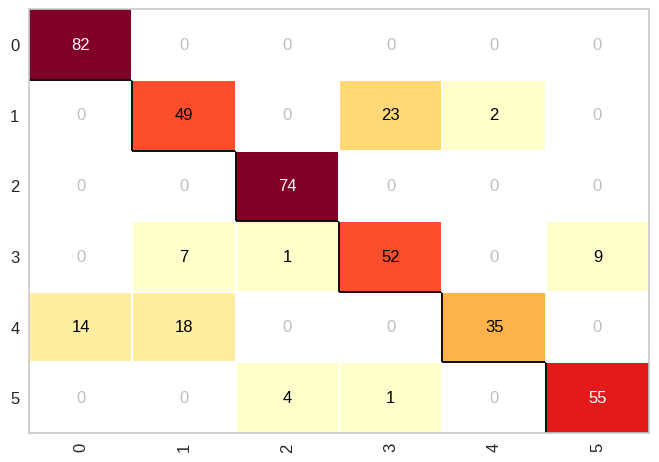

In [32]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino_encoded)
cm.score(X_teste, y_teste_encoded)

In [33]:
print(classification_report(y_teste_encoded, previsoes))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        82
           1       0.66      0.66      0.66        74
           2       0.94      1.00      0.97        74
           3       0.68      0.75      0.72        69
           4       0.95      0.52      0.67        67
           5       0.86      0.92      0.89        60

    accuracy                           0.81       426
   macro avg       0.82      0.81      0.80       426
weighted avg       0.82      0.81      0.81       426



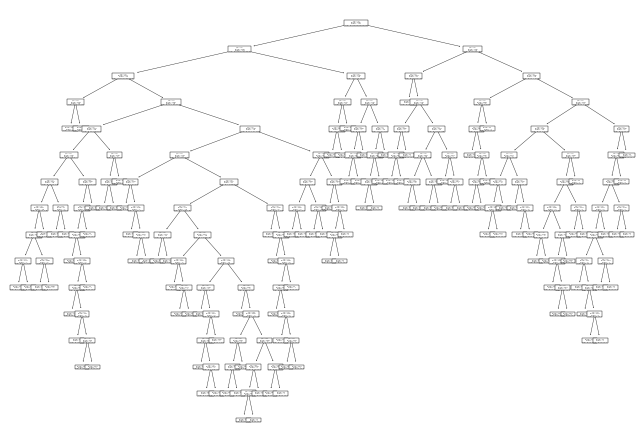

In [34]:
from sklearn import tree
plt.show(tree.plot_tree(Y))